In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Case study - zbiór `Boston House Dataset`

In [2]:
boston = pd.read_csv('../data/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Model prostej regresji liniowej
1. Podziel dane na część treningową i na część testową w stosunku 7:3.


2. Interesuje nas zależność ceny domu od średniej liczby pokoi w domu (zmienne `MEDV` i `RM`). Określ zmienną zależną i niezależną, a następnie:

      a) Narysuj wykres rozproszenia tych zmiennych. 
      
      b) Czy zmienne te są zależne? 
      
      c) Oblicz dla nich współczynnik korelacji Pearsona. 


3. Wyznacz funkcję regresji wielkości ceny domu względem średniej liczby pokoi. Narysuj ją na wykresie rozproszenia.


4. Zweryfikuj dopasowanie modelu:

    a) Czy istnieje związek pomiędzy zmienną zależną a niezależną?
    
    b) Czy wyraz wolny jest istotny w modelu?
    
    c) Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
    
    d) Sprawdź, czy spełnione jest założenie o rozkładzie normalnym reszt.
    
    e) Zweryfikuj dopasowanie modelu, sporządź wykresy diagnostyczne: wykres wartości przewidywanych względem prawdziwych, wykres residuów względem wartości dopasowanych.
    
    f) Wyznacz i porównaj jakość dopasowania i predykcji za pomocą różnych miar (np. MSE, MAE, $R^2$).

In [3]:
X, y = boston.iloc[:, boston.columns != 'MEDV'], boston['MEDV']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape[0] / X.shape[0], X_test.shape[0] / X.shape[0])

0.6996047430830039 0.30039525691699603


In [5]:
X_train = X_train.reset_index(drop=True)
X_test= X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58
1,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28
2,0.06888,0.0,2.46,0,0.488,6.144,62.2,2.5979,3,193,17.8,396.90,9.45
3,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
4,15.87440,0.0,18.10,0,0.671,6.545,99.1,1.5192,24,666,20.2,396.90,21.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
350,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
351,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70
352,9.18702,0.0,18.10,0,0.700,5.536,100.0,1.5804,24,666,20.2,396.90,23.60


0.7442292975830678

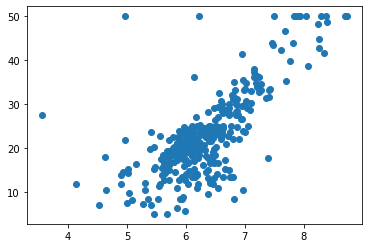

In [6]:
plt.scatter(X_train['RM'], y_train)

np.corrcoef(X_train['RM'], y_train)[0, 1]
# X_train['RM'].corr(y_train)  <-- UWAGA: daje dziwny wynik!! (bardzo mała korelacja)

### Model prosty (jedna zmienna)

In [7]:
RM_train = X_train['RM']
RM_train = sm.add_constant(RM_train)

model = sm.OLS(endog = y_train, exog = RM_train)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     437.0
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.15e-63
Time:                        17:12:51   Log-Likelihood:                -1147.4
No. Observations:                 354   AIC:                             2299.
Df Residuals:                     352   BIC:                             2307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.7419      2.960    -13.086      0.000     -44.564     -32.919
RM             9.7406      0.466     20.905      0.000       8.824      10.657
==============================================================================
Omnibus:                      109.596   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.146
Skew:                           1.037   Prob(JB):                    4.24e-200
Kurtosis:                      10.612   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

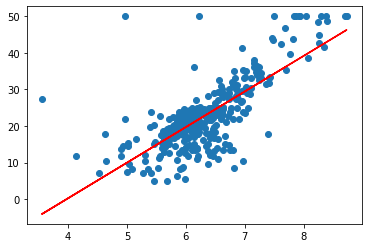

Współczynnik determinacji R^2 (R-squared): 0.5538772473809862


In [8]:
plt.scatter(X_train['RM'], y_train)
plt.plot(X_train['RM'], fitted_model.predict(RM_train), color='red')

plt.show()

print("Współczynnik determinacji R^2 (R-squared): {}".format(fitted_model.rsquared))

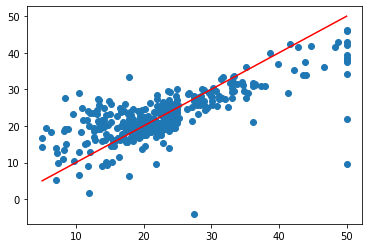

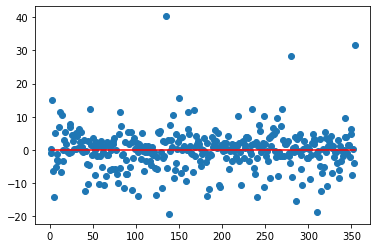

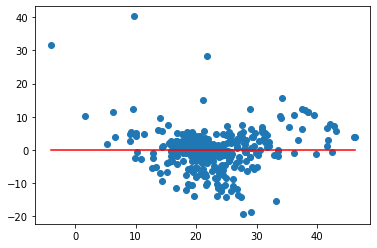

In [9]:
Ylin = np.linspace(y_train.min(), y_train.max(), 100)
plt.scatter(y_train, fitted_model.fittedvalues)
plt.plot(Ylin, Ylin, color='red')
plt.show()

# (i, e_i)
xrang = np.arange(1, len(fitted_model.resid) + 1)
plt.scatter(xrang, fitted_model.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

# (\hat{y}_i, e_i)
xrang = np.arange(fitted_model.fittedvalues.min(), fitted_model.fittedvalues.max(), 0.1)
plt.scatter(fitted_model.fittedvalues, fitted_model.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

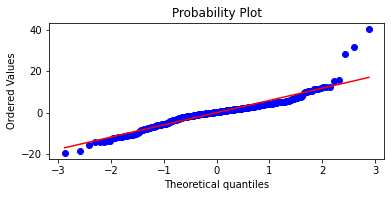

In [10]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6, 2.5))
sp.stats.probplot(fitted_model.resid, plot=ax, dist ='norm', fit=True)
plt.show()

In [11]:
# dopasowanie na zbiorze treningowym
lm = LinearRegression()
lm.fit(X=np.array(X_train['RM']).reshape(-1, 1), y=y_train)

print('R^2', lm.score(np.array(X_train['RM']).reshape(-1, 1), y_train))

print('MSE', metrics.mean_squared_error(y_train, lm.predict(np.array(X_train['RM']).reshape(-1, 1))))
print('MAE', metrics.mean_absolute_error(y_train, lm.predict(np.array(X_train['RM']).reshape(-1, 1))))
print('mAE', metrics.median_absolute_error(y_train, lm.predict(np.array(X_train['RM']).reshape(-1, 1))))

R^2 0.5538772473809861
MSE 38.27152901182499
MAE 4.148568558220874
mAE 2.673881525341125


In [12]:
# cross-walidacja

print('R^2', cross_val_score(lm, RM_train, y_train, cv = 3).mean())

print('MSE', -cross_val_score(lm, RM_train, y_train, cv = 3, scoring ='neg_mean_squared_error').mean())
print('MAE', -cross_val_score(lm, RM_train, y_train, cv = 3, scoring ='neg_mean_absolute_error').mean())
print('mAE', -cross_val_score(lm, RM_train, y_train, cv = 3, scoring ='neg_median_absolute_error').mean())

R^2 0.5473867320121569
MSE 38.93306290453348
MAE 4.155936340683023
mAE 2.5142007594847198


In [13]:
# predykcja na zbiorze testowym

print('MSE', metrics.mean_squared_error(y_test, lm.predict(np.array(X_test['RM']).reshape(-1, 1))))
print('MAE', metrics.mean_absolute_error(y_test, lm.predict(np.array(X_test['RM']).reshape(-1, 1))))
print('mAE', metrics.median_absolute_error(y_test, lm.predict(np.array(X_test['RM']).reshape(-1, 1))))

MSE 56.69163733537954
MAE 5.128433836316634
mAE 3.2955962461082073


## Model wielorakiej regresji liniowej

5. Wyznacz model liniowy najlepiej opisujący zależność wielkości ceny domu od pozostałych dostępnych zmiennych:

    a) Czy istnieje związek pomiędzy zmienną zależną, a którąkolwiek ze zmiennych niezależnych?
    
    b) Dla których zmiennych niezależnych Xj, j=1,...,10 można odrzucić hipotezę zerową  H0: βj = 0?
    
    c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
    
    d) Porównaj dopasowanie obu modeli (większego i mniejszego), sporządź wykresy diagnostyczne.
    
    e) Wyznacz i porównaj jakość dopasowania i predykcji dla modelu mniejszego i większego.

### Model pełny

In [14]:
train2 = sm.add_constant(X_train)

model2 = sm.OLS(endog = y_train, exog = train2)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     85.00
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           2.44e-98
Time:                        17:12:52   Log-Likelihood:                -1034.2
No. Observations:                 354   AIC:                             2096.
Df Residuals:                     340   BIC:                             2151.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9813      6.043      4.796      0.000      17.094      40.868
CRIM          -0.1010      0.035     -2.909      0.004      -0.169      -0.033
ZN             0.0400      0.016      2.551      0.011       0.009       0.071
INDUS          0.0754      0.072      1.045      0.297      -0.067       0.217
CHAS           0.2646      1.063      0.249      0.804      -1.826       2.355
NOX          -14.3409      4.595     -3.121      0.002     -23.380      -5.302
RM             4.8332      0.485      9.971      0.000       3.880       5.787
AGE           -0.0074      0.015     -0.488      0.626      -0.037       0.023
DIS           -1.3267      0.226     -5.879      0.000      -1.771      -0.883
RAD            0.2735      0.075      3.660      0.000       0.126       0.420
TAX           -0.0130      0.004     -3.059      0.002      -0.021      -0.005
PTRATIO       -0.9566      0.150     -6.372      0.000      -1.252      -0.661
B              0.0064      0.003      1.965      0.050   -7.31e-06       0.013
LSTAT         -0.4866      0.061     -8.032      0.000      -0.606      -0.367
==============================================================================
Omnibus:                      164.467   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.790
Skew:                           1.865   Prob(JB):                    1.19e-220
Kurtosis:                      10.399   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

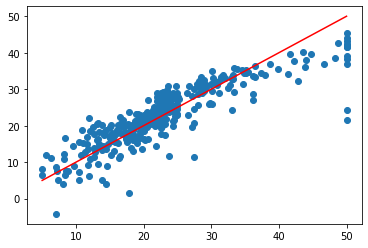

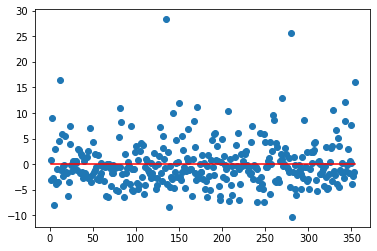

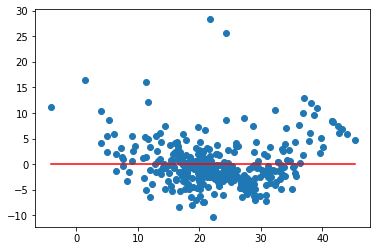

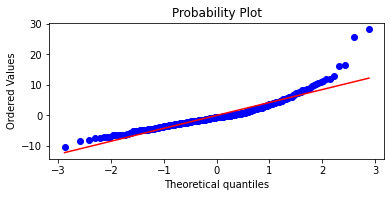

In [15]:
Ylin = np.linspace(y_train.min(), y_train.max(), 100)
plt.scatter(y_train, fitted_model2.fittedvalues)
plt.plot(Ylin, Ylin, color='red')
plt.show()

# (i, e_i)
xrang = np.arange(1, len(fitted_model2.resid) + 1)
plt.scatter(xrang, fitted_model2.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

# (\hat{y}_i, e_i)
xrang = np.arange(fitted_model2.fittedvalues.min(), fitted_model2.fittedvalues.max(), 0.1)
plt.scatter(fitted_model2.fittedvalues, fitted_model2.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

fig, ax = plt.subplots(figsize=(6, 2.5))
sp.stats.probplot(fitted_model2.resid, plot=ax, dist ='norm', fit=True)
plt.show()

In [16]:
# dopasowanie na zbiorze treningowym
lm2 = LinearRegression()
lm2.fit(X=X_train, y=y_train)

print('R^2', lm2.score(X_train, y_train))

print('MSE', metrics.mean_squared_error(y_train, lm2.predict(X_train)))
print('MAE', metrics.mean_absolute_error(y_train, lm2.predict(X_train)))
print('mAE', metrics.median_absolute_error(y_train, lm2.predict(X_train)))

R^2 0.7647156501433012
MSE 20.184336639873152
MAE 3.1219958710301183
mAE 2.3178984714778785


In [17]:
# predykcja na zbiorze testowym

print('MSE', metrics.mean_squared_error(y_test, lm2.predict(X_test)))
print('MAE', metrics.mean_absolute_error(y_test, lm2.predict(X_test)))
print('mAE', metrics.median_absolute_error(y_test, lm2.predict(X_test)))

MSE 28.405854810508163
MAE 3.6913626771162664
mAE 2.7094922194474282


### Model zredukowany

In [20]:
subset_features = np.array(model2.exog_names)[fitted_model2.pvalues < 0.05][1:]

fitted_red = sm.OLS(endog = y_train, exog = train2[subset_features])
fitted_model_red = fitted_red.fit()
fitted_model_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              996.0
Date:                Sun, 04 Jun 2023   Prob (F-statistic):                   7.35e-241
Time:                        17:13:55   Log-Likelihood:                         -1052.5
No. Observations:                 354   AIC:                                      2123.
Df Residuals:                     345   BIC:                                      2158.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0996      0.036     -2.754      0.006      -0.171      -0.028
ZN             0.0424      0.016      2.620      0.009       0.011       0.074
NOX           -0.3896      3.669     -0.106      0.915      -7.605       6.826
RM             6.6187      0.327     20.244      0.000       5.976       7.262
DIS           -0.8155      0.197     -4.129      0.000      -1.204      -0.427
RAD            0.1094      0.069      1.583      0.114      -0.027       0.245
TAX           -0.0099      0.004     -2.555      0.011      -0.017      -0.002
PTRATIO       -0.4054      0.120     -3.374      0.001      -0.642      -0.169
LSTAT         -0.4319      0.056     -7.698      0.000      -0.542      -0.322
==============================================================================
Omnibus:                      187.936   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1675.327
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      12.840   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

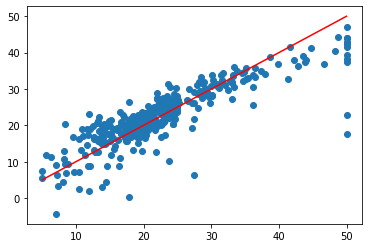

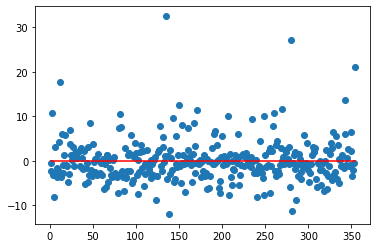

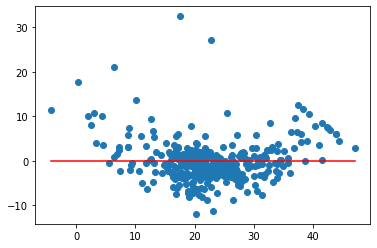

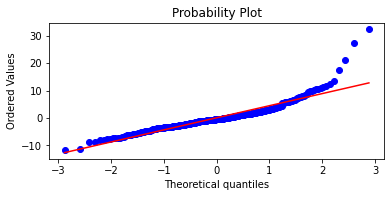

In [21]:
Ylin = np.linspace(y_train.min(), y_train.max(), 100)
plt.scatter(y_train, fitted_model_red.fittedvalues)
plt.plot(Ylin, Ylin, color='red')
plt.show()

# (i, e_i)
xrang = np.arange(1, len(fitted_model_red.resid) + 1)
plt.scatter(xrang, fitted_model_red.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

# (\hat{y}_i, e_i)
xrang = np.arange(fitted_model_red.fittedvalues.min(), fitted_model_red.fittedvalues.max(), 0.1)
plt.scatter(fitted_model_red.fittedvalues, fitted_model_red.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

fig, ax = plt.subplots(figsize=(6, 2.5))
sp.stats.probplot(fitted_model_red.resid, plot=ax, dist ='norm', fit=True)
plt.show()

In [22]:
# dopasowanie na zbiorze treningowym
lm_red = LinearRegression()
lm_red.fit(X=X_train[subset_features], y=y_train)

print('R^2', lm_red.score(X_train[subset_features], y_train))

print('MSE', metrics.mean_squared_error(y_train, lm_red.predict(X_train[subset_features])))
print('MAE', metrics.mean_absolute_error(y_train, lm_red.predict(X_train[subset_features])))
print('mAE', metrics.median_absolute_error(y_train, lm_red.predict(X_train[subset_features])))

R^2 0.7611884565947701
MSE 20.48692396461831
MAE 3.1751658828638867
mAE 2.32548032356973


In [23]:
# predykcja na zbiorze testowym

print('MSE', metrics.mean_squared_error(y_test, lm_red.predict(X_test[subset_features])))
print('MAE', metrics.mean_absolute_error(y_test, lm_red.predict(X_test[subset_features])))
print('mAE', metrics.median_absolute_error(y_test, lm_red.predict(X_test[subset_features])))

MSE 29.664652667674964
MAE 3.8001781882710297
mAE 2.811748563457547


## Regularyzacja

6. Zastosuj regularyzację

    a) grzbietową
    
    b) Lasso


### Ridge

In [24]:
estimator_ridge = make_pipeline(StandardScaler(), Ridge())

grid = GridSearchCV(estimator=estimator_ridge, 
                    param_grid = {'ridge__alpha': np.linspace(0.01, 15, 100)},
                    scoring='neg_mean_squared_error',
                    cv=10
                    )

grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-02, 1.61414141e-01, 3.12828283e-01, 4.64242424e-01,
       6.15656566e-01, 7.67070707e-01, 9.18484848e-01, 1.06989899e+00,
       1.22131313e+00, 1.37272727e+00, 1.52414141e+00, 1.67555556e+00,
       1.82696970e+00, 1.97838384e+00, 2.129...
       1.15174747e+01, 1.16688889e+01, 1.18203030e+01, 1.19717172e+01,
       1.21231313e+01, 1.22745455e+01, 1.24259596e+01, 1.25773737e+01,
       1.27287879e+01, 1.28802020e+01, 1.30316162e+01, 1.31830303e+01,
       1.33344444e+01, 1.34858586e+01, 1.36372727e+01, 1.37886869e+01,
       1.39401010e+01, 1.40915152e+01, 1.42429293e+01, 1.43943434e+01,
       1.45457576e+01, 1.46971717e+01, 1.48485859e+01, 1.50000000e+01])},
             scoring='neg_mean_squared_error')

In [25]:
print(grid.best_params_)  # najlepsza alpha
print(-grid.best_score_)  # MSE na zbiorze treningowym

{'ridge__alpha': 9.246262626262626}
22.613145303041062


In [26]:
# inny sposób (ale nie działa dla siatki wielowymiarowej):

ridgecv = make_pipeline(StandardScaler(),
                        RidgeCV(alphas=np.linspace(0.01, 15, 100), scoring='neg_mean_squared_error', cv=10)
                       )

ridgecv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-02, 1.61414141e-01, 3.12828283e-01, 4.64242424e-01,
       6.15656566e-01, 7.67070707e-01, 9.18484848e-01, 1.06989899e+00,
       1.22131313e+00, 1.37272727e+00, 1.52414141e+00, 1.67555556e+00,
       1.82696970e+00, 1.97838384e+00, 2.12979798e+00, 2.28121212e+00,
       2.43262626e+00, 2.58404040...
       1.15174747e+01, 1.16688889e+01, 1.18203030e+01, 1.19717172e+01,
       1.21231313e+01, 1.22745455e+01, 1.24259596e+01, 1.25773737e+01,
       1.27287879e+01, 1.28802020e+01, 1.30316162e+01, 1.31830303e+01,
       1.33344444e+01, 1.34858586e+01, 1.36372727e+01, 1.37886869e+01,
       1.39401010e+01, 1.40915152e+01, 1.42429293e+01, 1.43943434e+01,
       1.45457576e+01, 1.46971717e+01, 1.48485859e+01, 1.50000000e+01]),
                         cv=10, scoring='neg_mean_squared_error'))])

In [27]:
ridgecv['ridgecv'].alpha_  # trochę inny wynik, ale dużo szybsze obliczenia!

8.792020202020202

In [28]:
# Ridge z najlepszym parametrem alpha

ridge = make_pipeline(StandardScaler(), Ridge(alpha=ridgecv['ridgecv'].alpha_))
fitted_ridge = ridge.fit(X_train, y_train)

In [29]:
# dopasowanie na zbiorze treningowym

print('MSE', metrics.mean_squared_error(y_train, fitted_ridge.predict(X_train)))
print('MAE', metrics.mean_absolute_error(y_train, fitted_ridge.predict(X_train)))
print('mAE', metrics.median_absolute_error(y_train, fitted_ridge.predict(X_train)))

MSE 20.274235014597572
MAE 3.0963449117894477
mAE 2.3179864406853454


In [30]:
# predykcja na zbiorze testowym

print('MSE', metrics.mean_squared_error(y_test, fitted_ridge.predict(X_test)))
print('MAE', metrics.mean_absolute_error(y_test, fitted_ridge.predict(X_test)))
print('mAE', metrics.median_absolute_error(y_test, fitted_ridge.predict(X_test)))

MSE 28.586751846475
MAE 3.6477449677312004
mAE 2.5398639689976523


### Lasso

In [31]:
estimator_lasso = make_pipeline(StandardScaler(), Lasso())

grid = GridSearchCV(estimator=estimator_lasso, 
                    param_grid = {'lasso__alpha': np.linspace(0.001, 15, 100)},
                    scoring='neg_mean_squared_error',
                    cv=10
                    )

grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000000e-03, 1.52505051e-01, 3.04010101e-01, 4.55515152e-01,
       6.07020202e-01, 7.58525253e-01, 9.10030303e-01, 1.06153535e+00,
       1.21304040e+00, 1.36454545e+00, 1.51605051e+00, 1.66755556e+00,
       1.81906061e+00, 1.97056566e+00, 2.122...
       1.15153838e+01, 1.16668889e+01, 1.18183939e+01, 1.19698990e+01,
       1.21214040e+01, 1.22729091e+01, 1.24244141e+01, 1.25759192e+01,
       1.27274242e+01, 1.28789293e+01, 1.30304343e+01, 1.31819394e+01,
       1.33334444e+01, 1.34849495e+01, 1.36364545e+01, 1.37879596e+01,
       1.39394646e+01, 1.40909697e+01, 1.42424747e+01, 1.43939798e+01,
       1.45454848e+01, 1.46969899e+01, 1.48484949e+01, 1.50000000e+01])},
             scoring='neg_mean_squared_error')

In [32]:
print(grid.best_params_)  # najlepsza alpha
print(-grid.best_score_)  # MSE na zbiorze treningowym

{'lasso__alpha': 0.001}
22.719510452014998


In [33]:
# inny sposób (ale nie działa dla siatki wielowymiarowej):

lassocv = make_pipeline(StandardScaler(), LassoCV(cv=10))
lassocv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=10))])

In [34]:
lassocv['lassocv'].alpha_  # inny wynik, ale dużo szybsze obliczenia!

0.01707484919331912

In [35]:
# Lasso z najlepszym parametrem alpha

lasso = make_pipeline(StandardScaler(), Lasso(alpha=grid.best_params_['lasso__alpha']))
fitted_lasso = lasso.fit(X_train, y_train)

In [36]:
# dopasowanie na zbiorze treningowym

print('MSE', metrics.mean_squared_error(y_train, fitted_lasso.predict(X_train)))
print('MAE', metrics.mean_absolute_error(y_train, fitted_lasso.predict(X_train)))
print('mAE', metrics.median_absolute_error(y_train, fitted_lasso.predict(X_train)))

MSE 20.184404419210235
MAE 3.1210836776924777
mAE 2.3047299300515647


In [37]:
# predykcja na zbiorze testowym

print('MSE', metrics.mean_squared_error(y_test, fitted_lasso.predict(X_test)))
print('MAE', metrics.mean_absolute_error(y_test, fitted_lasso.predict(X_test)))
print('mAE', metrics.median_absolute_error(y_test, fitted_lasso.predict(X_test)))

MSE 28.413256774673144
MAE 3.6905530510930475
mAE 2.711400663611766


## Model regresji wielomianowej

7. Dopasuj model regresji wielomianowej:
        
    a) Znajdź optymalny stopień wielomianu.
    
    b) Zweryfikuj dopasowanie modelu, sporządź wykresy diagnostyczne.
    
    c) Zastosuj regularyzację znajdując najlepszy parametr $\alpha$.

### Regresja wielomianowa

In [38]:
estimator_degree = make_pipeline(PolynomialFeatures(), LinearRegression())

grid = GridSearchCV(estimator=estimator_degree,
                    param_grid={'polynomialfeatures__degree': np.arange(1, 5)},
                    scoring = 'neg_median_absolute_error',
                    cv = 10
                   )

grid.fit(X=X_train, y=y_train)
print(grid.best_params_)  # najlepszy stopień wielomianu (UWAGA: zależy od użytego argmentu 'scoring')

{'polynomialfeatures__degree': 2}


In [39]:
estimator_degree = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
estimator_degree.fit(X=X_train, y=y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [40]:
# dopasowanie na zbiorze treningowym

print('MSE', metrics.mean_squared_error(y_train, estimator_degree.predict(X_train)))
print('MAE', metrics.mean_absolute_error(y_train, estimator_degree.predict(X_train)))
print('mAE', metrics.median_absolute_error(y_train, estimator_degree.predict(X_train)))

MSE 5.762505467241369
MAE 1.8074838952156107
mAE 1.4391179621219656


In [41]:
# predykcja na zbiorze testowym

print('MSE', metrics.mean_squared_error(y_test, estimator_degree.predict(X_test)))
print('MAE', metrics.mean_absolute_error(y_test, estimator_degree.predict(X_test)))
print('mAE', metrics.median_absolute_error(y_test, estimator_degree.predict(X_test)))

MSE 22.83623305025278
MAE 3.022858551615163
mAE 2.322455102205277


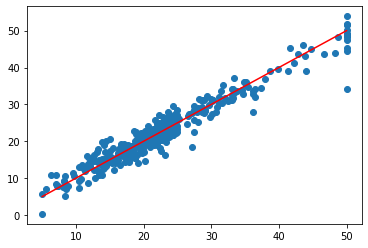

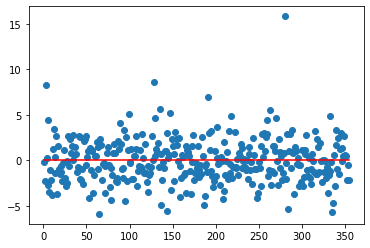

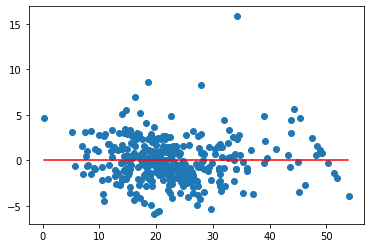

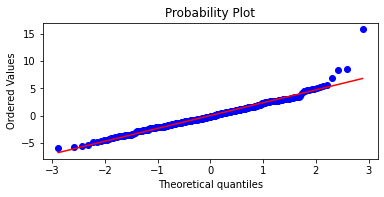

In [62]:
Ylin = np.linspace(y_train.min(), y_train.max(), 100)
plt.scatter(y_train, estimator_degree.predict(X_train))
plt.plot(Ylin, Ylin, color='red')
plt.show()

resid = y_train - estimator_degree.predict(X_train)

# (i, e_i)
xrang = np.arange(1, len(resid) + 1)
plt.scatter(xrang, resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

# (\hat{y}_i, e_i)
xrang = np.arange(estimator_degree.predict(X_train).min(), estimator_degree.predict(X_train).max(), 0.1)
plt.scatter(estimator_degree.predict(X_train), resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

fig, ax = plt.subplots(figsize=(6, 2.5))
sp.stats.probplot(resid, plot=ax, dist ='norm', fit=True)
plt.show()

### Regularyzacja

In [43]:
poly_ridge_estimator = make_pipeline(PolynomialFeatures(include_bias=False), StandardScaler(), Ridge())
poly_ridge_estimator

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [44]:
grid2 = GridSearchCV(estimator=poly_ridge_estimator,
                     param_grid={'polynomialfeatures__degree': [1, 2, 3],
                                 'ridge__alpha': np.linspace(5, 15, 20)
                                },
                     scoring='neg_mean_squared_error',
                     cv=10
                     )

grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': array([ 5.        ,  5.52631579,  6.05263158,  6.57894737,  7.10526316,
        7.63157895,  8.15789474,  8.68421053,  9.21052632,  9.73684211,
       10.26315789, 10.78947368, 11.31578947, 11.84210526, 12.36842105,
       12.89473684, 13.42105263, 13.94736842, 14.47368421, 15.        ])},
             scoring='neg_mean_squared_error')

In [45]:
grid2.best_params_ # optymalne parametry

{'polynomialfeatures__degree': 3, 'ridge__alpha': 11.31578947368421}

In [46]:
ridge_poly = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Ridge(alpha=grid2.best_params_['ridge__alpha']))
ridge_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=11.31578947368421))])

In [47]:
# dopasowanie na zbiorze treningowym

print('MSE', metrics.mean_squared_error(y_train, ridge_poly.predict(X_train)))
print('MAE', metrics.mean_absolute_error(y_train, ridge_poly.predict(X_train)))
print('mAE', metrics.median_absolute_error(y_train, ridge_poly.predict(X_train)))

MSE 6.5854787475955545
MAE 1.8078592028404077
mAE 1.2506970009136538


In [48]:
# predykcja na zbiorze testowym

print('MSE', metrics.mean_squared_error(y_test, ridge_poly.predict(X_test)))
print('MAE', metrics.mean_absolute_error(y_test, ridge_poly.predict(X_test)))
print('mAE', metrics.median_absolute_error(y_test, ridge_poly.predict(X_test)))

MSE 16.725851496001347
MAE 2.5175894953917735
mAE 1.6628086791066323


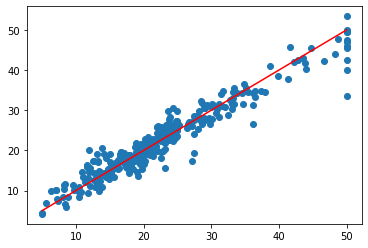

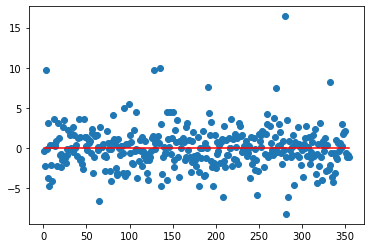

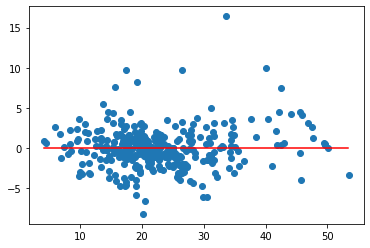

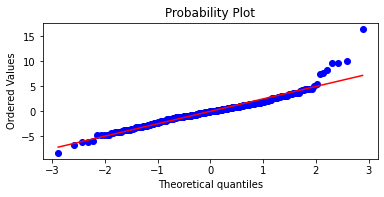

In [61]:
Ylin = np.linspace(y_train.min(), y_train.max(), 100)
plt.scatter(y_train, ridge_poly.predict(X_train))
plt.plot(Ylin, Ylin, color='red')
plt.show()

resid = y_train - ridge_poly.predict(X_train)

# (i, e_i)
xrang = np.arange(1, len(resid) + 1)
plt.scatter(xrang, resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

# (\hat{y}_i, e_i)
xrang = np.arange(ridge_poly.predict(X_train).min(), ridge_poly.predict(X_train).max(), 0.1)
plt.scatter(ridge_poly.predict(X_train), resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
plt.show()

fig, ax = plt.subplots(figsize=(6, 2.5))
sp.stats.probplot(resid, plot=ax, dist ='norm', fit=True)
plt.show()

## Podsumowanie

8. Dokonaj porównania dopasowanych powyżej modeli regresji pod względem błędu dopasowania i błędu predykcji (dane końcowe przedstaw za pomocą tabeli). 
    
**Pamiętaj o graficznej ewaluacji modeli regresji!!!**

In [50]:
def pred_scores(model, X, y):
    
    MSE = metrics.mean_squared_error(y_true=y, y_pred=model.predict(X))
    MAE = metrics.mean_absolute_error(y_true=y, y_pred=model.predict(X))
    mAE = metrics.median_absolute_error(y_true=y, y_pred=model.predict(X))

    results = {}
    results['MSE'] = MSE
    results['MAE'] = MAE
    results['mAE'] = mAE
    
    return results

In [51]:
models_train = {}

models_train['lm'] = pred_scores(lm, np.array(X_train['RM']).reshape(-1, 1), y_train)
models_train['lm2'] = pred_scores(lm2, X_train, y_train)
models_train['lm_red'] = pred_scores(lm_red, X_train[subset_features], y_train)
models_train['ridge'] = pred_scores(ridge, X_train, y_train)
models_train['lasso'] = pred_scores(lasso, X_train, y_train)
models_train['poly'] = pred_scores(estimator_degree, X_train, y_train)
models_train['ridge_poly'] = pred_scores(ridge_poly, X_train, y_train)

In [52]:
models_test = {}

models_test['lm'] = pred_scores(lm, np.array(X_test['RM']).reshape(-1, 1), y_test)
models_test['lm2'] = pred_scores(lm2, X_test, y_test)
models_test['lm_red'] = pred_scores(lm_red, X_test[subset_features], y_test)
models_test['ridge'] = pred_scores(ridge, X_test, y_test)
models_test['lasso'] = pred_scores(lasso, X_test, y_test)
models_test['poly'] = pred_scores(estimator_degree, X_test, y_test)
models_test['ridge_poly'] = pred_scores(ridge_poly, X_test, y_test)

In [53]:
pd.DataFrame(models_train)

,lm,lm2,lm_red,ridge,lasso,poly,ridge_poly
MSE,38.271529,20.184337,20.486924,20.274235,20.184404,5.762505,6.585479
MAE,4.148569,3.121996,3.175166,3.096345,3.121084,1.807484,1.807859
mAE,2.673882,2.317898,2.325480,2.317986,2.304730,1.439118,1.250697


In [54]:
pd.DataFrame(models_test)

,lm,lm2,lm_red,ridge,lasso,poly,ridge_poly
MSE,56.691637,28.405855,29.664653,28.586752,28.413257,22.836233,16.725851
MAE,5.128434,3.691363,3.800178,3.647745,3.690553,3.022859,2.517589
mAE,3.295596,2.709492,2.811749,2.539864,2.711401,2.322455,1.662809
